## Import libraries and customize matplotlib styles params

In [1]:

import numpy as np
import matplotlib.pyplot as plt

# https://matplotlib.org/stable/tutorials/introductory/customizing.html

%matplotlib widget

# set defaults
plt.rcParams.update(plt.rcParamsDefault)

SMALL_SIZE  = 11
MEDIUM_SIZE = 14
BIGGER_SIZE = 16

# fonts
plt.rc('font',  size=SMALL_SIZE)
# title
plt.rc('axes',titlesize=BIGGER_SIZE)
plt.rc('axes',titleweight='bold')
# xy-labells
plt.rc('axes',labelsize=SMALL_SIZE)
# xy-ticks
plt.rc('xtick',labelsize=SMALL_SIZE)
plt.rc('ytick',labelsize=SMALL_SIZE)
# legend
plt.rc('legend',fontsize =SMALL_SIZE)
plt.rc('legend',framealpha=1)
plt.rc('legend',loc='upper left')
# lines
plt.rc('lines',linewidth=1)
# grid
plt.rc('axes' ,grid=True)

# pixel in inches
px2inch = 1/plt.rcParams['figure.dpi']

def plot_sets(ax,ti='',xla='',yla='',ba=1,xli=False,yli=False,leg=False):

    ax.set_title(ti)
    ax.set_xlabel(xla)
    ax.set_ylabel(yla)
    ax.set_box_aspect(ba)

    if xli: ax.set_xlim(xli)
    if yli: ax.set_ylim(yli)
    if leg: ax.legend()



In [2]:
def get_wavelet(t,f0,n_cycles):
    sigma        = n_cycles/(2*np.pi*f0)
    gaussian     = np.exp(-t**2/(2*sigma**2))
    complex_wave = np.exp(-2*np.pi*1j*f0*t)
    return complex_wave*gaussian  

def filter_wavelet(t,signal,tu,n,f):
    k    = 1.75
    dt   = (n * 1/f)/k
    indx = np.logical_or(t<=tu-dt, t>=tu+dt)
    signal[indx] = np.nan 
    return signal

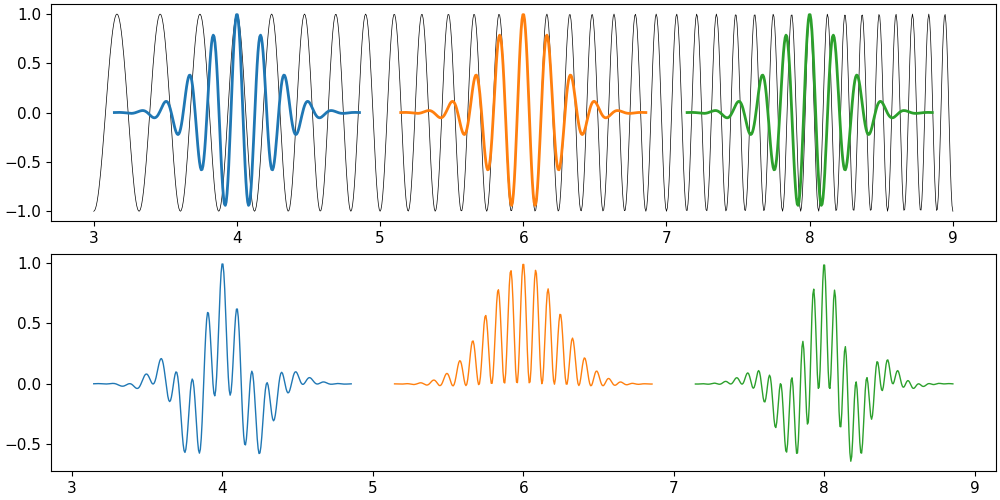

In [3]:

fig, ax = plt.subplots(2,1,constrained_layout=True,figsize=(1000*px2inch ,500*px2inch))

Nt       = 1000
t        = np.linspace(3,9,Nt)
signal   = np.cos(2*np.pi*(t**2/2))
n_cycles = 9
f0       = 6
dxy      = 0.001
ax[0].plot(t,signal,'k',lw=0.5)
for tu in [4,6,8]:

    wavelet   = get_wavelet(t-tu,f0,n_cycles)
    wavelet_r = np.real( wavelet )
    ax[0].plot(t, filter_wavelet(t,wavelet_r,tu,n_cycles,f0),lw=2)

    conv_r = wavelet_r*signal
    ax[1].plot(t, filter_wavelet(t,conv_r,tu,n_cycles,f0) )

ax[0].grid(False)
ax[1].grid(False)

plt.show()

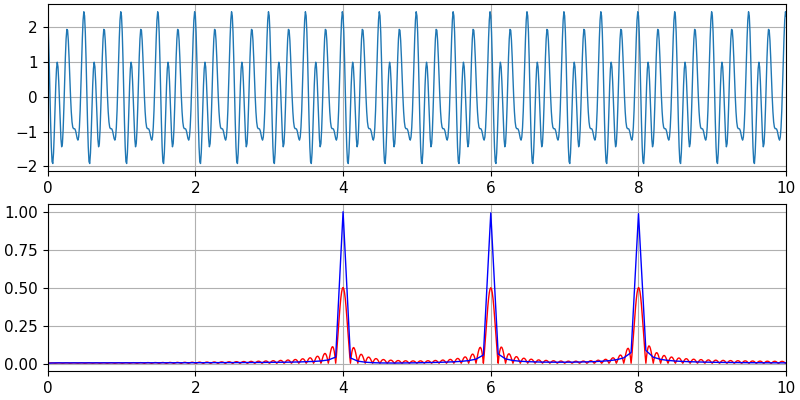

In [4]:
def get_signal(t,A_array=[1,2,2],f_array=[10,20,30]):

    y = np.zeros_like(t)
    for A,f in zip(A_array,f_array):
        y+= A*np.sin(2*np.pi*f*t + np.random.rand()*np.pi)
    return y

def DFT0(y):
    return np.fft.fft(y)

def spectrum_frequencies(Y,fs):

    N         = Y.size
    Yall      = np.abs(Y)/N
    Ypos      = np.copy( Yall[:int(N/2)+1] )
    Ypos[1:] *= 2

    fall = np.arange(0,N)*fs/N
    fpos = np.linspace(0,fs/2,int(N/2)+1)
    
    return Yall,Ypos,fall,fpos

fig, ax = plt.subplots(2,1,constrained_layout=True,figsize=(800*px2inch ,400*px2inch))


Nt = 1001
t  = np.linspace(0,10,Nt)
f_array = np.round( np.random.rand(5)*10)
f_array = np.array([4,6,8])
A_array = np.ones_like(f_array)
y  = get_signal(t,A_array=A_array,f_array=f_array)
F  = np.zeros_like(t)
fs = ( t[1]-t[0] )**-1

tn = np.arange(Nt)/Nt
for i,f0 in enumerate(t):
    
    f_r   = np.sum( y*np.cos(2*np.pi*f0*t) )
    f_c   = np.sum( y*np.sin(2*np.pi*f0*t) )
    F[i]  = np.sqrt( f_r**2 + f_c**2  )/Nt

ax[0].plot(t,y)


ax[1].plot(t,F,'r')

Y = DFT0(y)
Yall,Ypos,fall,fpos = spectrum_frequencies(Y,fs)
ax[1].plot(fpos,Ypos,'b')

ax[0].set_xlim(0,10)
ax[1].set_xlim(0,10)

plt.show()


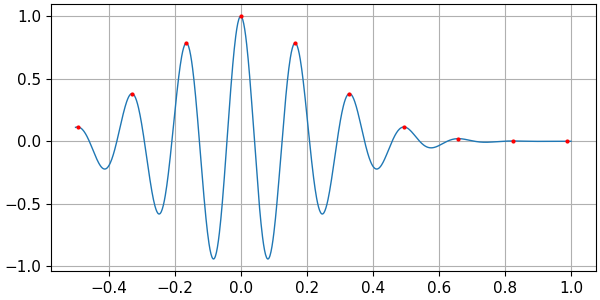

In [5]:
def get_max(x,y):
    N    = y.size
    indx = []
    for i in range(1,N-1):
        if y[i-1]<y[i] and y[i]>y[i+1]:
           indx.append(i)
    indx = np.array(indx)
    return x[indx],y[indx]

fig, ax = plt.subplots(1,1,constrained_layout=True,figsize=(600*px2inch ,300*px2inch))

Nt       = 1000
t        = np.linspace(-0.5,1,Nt)
n_cycles = 9
f0       = 6
tu       = 1e-9

wavelet   = get_wavelet(t-tu,f0,n_cycles)
wavelet_r = np.real( wavelet )
ax.plot(t, wavelet_r,lw=1)

t_max,y_max = get_max(t,wavelet_r)
ax.plot(t_max,y_max,'ro',ms=2) 

plt.show()

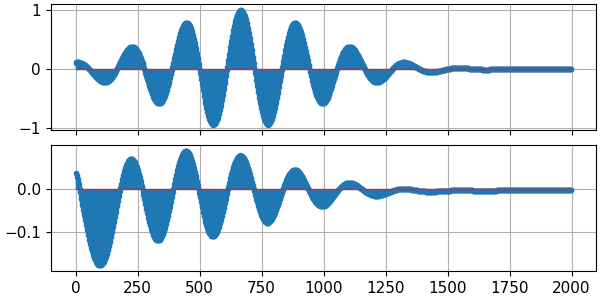

In [6]:
fig, ax_arr = plt.subplots(2,1,constrained_layout=True,figsize=(600*px2inch ,300*px2inch),sharex=True)

n  = wavelet_r.size
dx = 2
h  = wavelet_r
x  = dx*np.arange(n)
e  = np.arctan2( h[1:]-h[0],x[1:] ) * 180/np.pi

ms = 3
ax = ax_arr[0]
markerline, stemlines, baseline  = ax.stem(x,h)
markerline.set_markersize(ms)

ax = ax_arr[1]
markerline, stemlines, baseline = ax.stem(x[1:],e)
markerline.set_markersize(ms) 
plt.show()

In [7]:
w=np.linspace(2*np.pi/3,4*np.pi/3,100)

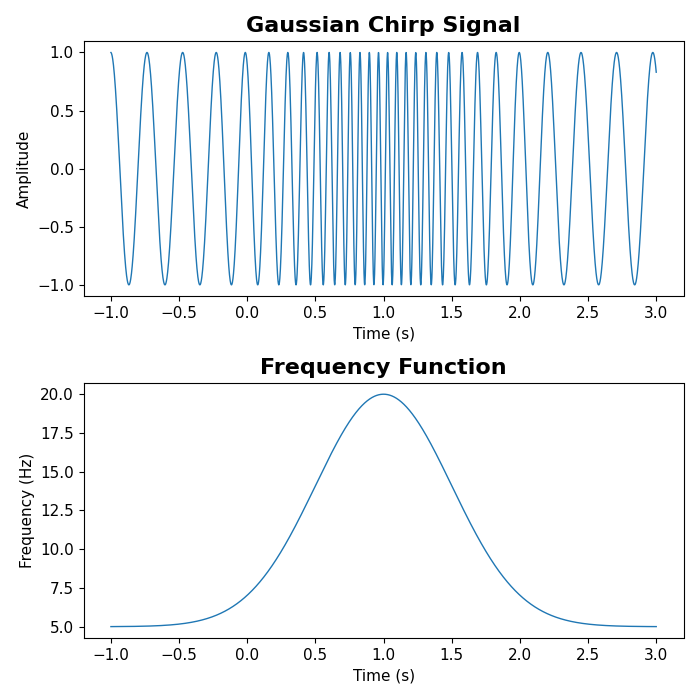

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
A = 1.0          # Amplitude
f0 = 5           # Initial frequency in Hz
f_peak = 20      # Peak frequency in Hz
t0 = 1           # Time at which frequency is maximum
sigma = 0.5      # Controls the width of the Gaussian
duration = 3     # Duration of the signal in seconds
fs = 1000        # Sampling frequency in Hz

# Time array
t = np.linspace(-1, duration, int(fs * duration))

# Gaussian envelope
g = np.exp(-((t - t0) ** 2) / (2 * sigma ** 2))

# Frequency function
f_t = f0 + (f_peak - f0) * g

# Phase function
phase = 2 * np.pi * np.cumsum(f_t) / fs

# Chirp signal
s =  A * np.cos(phase)

# Plotting
plt.figure(figsize=(7,7))

# Plot chirp signal
plt.subplot(2, 1, 1)
plt.plot(t, s)
plt.title('Gaussian Chirp Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid()

# Plot frequency function
plt.subplot(2, 1, 2)
plt.plot(t, f_t)
plt.title('Frequency Function')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.grid()

plt.tight_layout()
plt.show()

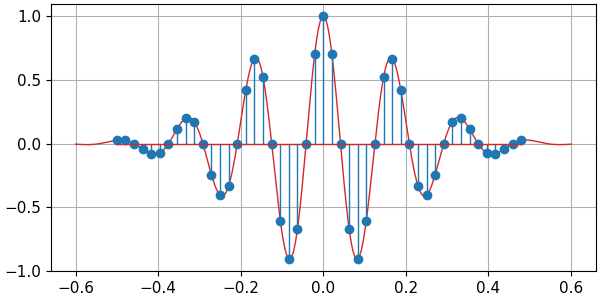

In [9]:
def get_wavelet(t,f0,n_cycles):
    sigma        = n_cycles/(2*np.pi*f0)
    gaussian     = np.exp(-t**2/(2*sigma**2))
    complex_wave = np.exp(-2*np.pi*1j*f0*t)
    return complex_wave*gaussian  

Nt       = 1001
k        = 0.6
t        = np.linspace(-k,k,Nt)
n_cycles = 7
f0       = 6
tu       = 1e-9

fig, ax   = plt.subplots(1,1,constrained_layout=True,figsize=(600*px2inch ,300*px2inch))
wavelet   = get_wavelet(t,f0,n_cycles)
wavelet_r = np.real( wavelet )
ax.plot(t, wavelet_r,'tab:red')

T          = f0**-1
t2         = np.arange(-3*T,3*T,T/8)
wavelet2   = get_wavelet(t2,f0,n_cycles)
wavelet_r2 = np.real( wavelet2 )
ax.stem(t2, wavelet_r2)

plt.show()